# inroduction into python pandas library 

In [4]:
import pandas
pandas.__version__

'1.4.4'

## creating pandas series data structure

### from numpy arrays

In [1]:
#pandas series data structure
import numpy as np
import pandas as pd
data = pd.Series(np.linspace(0, 1, 5))
print(data)

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64


In [6]:
data.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [7]:
data.index

RangeIndex(start=0, stop=5, step=1)

### explicit index definition

In [8]:
# explicit index definition gives the Series object additional capabilities.
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
print (data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


In [9]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [10]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [11]:
data['b']

0.5

- Series as generalized NumPy array

In [12]:
#We can even use noncontiguous or nonsequential indices:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=[2, 5, 3, 7])
print(data)

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64


In [13]:
 data[3]

0.75

- from python dictionaries

In [14]:
#Series as specialized dictionary
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)
print(population)

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


## creating pandas dataframes data structure

- DataFrame as a generalized NumPy array

In [15]:
import pandas as pd
import numpy as np
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
print(area)
population_dict = {'California': 38332521,'Texas': 26448193,'New York': 19651127,'Florida': 19552860,'Illinois': 12882135}
population = pd.Series(population_dict)
print(population)
states = pd.DataFrame({'population': population,'area': area})
print(states)


California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64
            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995


In [16]:
states.columns

Index(['population', 'area'], dtype='object')

In [17]:
states.values

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297],
       [19552860,   170312],
       [12882135,   149995]], dtype=int64)

In [18]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

- DataFrame as specialized dictionary.


In [19]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [20]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

- From a single Series object.

In [21]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


- From a list of dicts

In [22]:
data = [{'a': i, 'b': 2 * i}for i in range(5)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8


In [23]:
#Even if some keys in the dictionary are missing, Pandas will fill them in with NaN (i.e.,“not a number”) values:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


- From a dictionary of Series objects.

In [24]:
#From a dictionary of Series objects.
pd.DataFrame({'population': population,'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


- From a two-dimensional NumPy array.

In [25]:
pd.DataFrame(np.random.rand(3, 2),
columns=['foo', 'bar'],
index=['a', 'b','c'])

,foo,bar
a,0.504640,0.139506
b,0.755932,0.835297
c,0.730212,0.083890


- From a NumPy structured array.

In [26]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
print(A)
pd.DataFrame(A)

[(0, 0.) (0, 0.) (0, 0.)]


,A,B
0,0,0.0
1,0,0.0
2,0,0.0


- From a NumPy structured array

In [34]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


# The Pandas Index Object

In [27]:
#The Pandas Index Object data structure.
ind = pd.Index([2, 3, 5, 7, 11])
print(ind)

Int64Index([2, 3, 5, 7, 11], dtype='int64')


- Index as immutable array.

In [28]:
ind[1]

3

In [29]:
ind[4]

11

In [30]:
ind.dtype

dtype('int64')

In [31]:
ind.size

5

In [32]:
ind.shape

(5,)

In [33]:
ind[1]=4

TypeError: Index does not support mutable operations

In [ ]:
#This immutability makes it safer to share indices between multiple DataFrames and arrays, without the potential for side effects from inadvertent index modification.

- Index as ordered set

In [2]:
#Index as ordered set.
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
indA.intersection(indB)
#can also be (indA & indB # intersection)

Int64Index([3, 5, 7], dtype='int64')

In [3]:
indA | indB # union

C:\Users\DELL\AppData\Local\Temp\ipykernel_10516\4042773156.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  indA | indB # union


Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [4]:
indA ^ indB # symmetric difference

C:\Users\DELL\AppData\Local\Temp\ipykernel_10516\1357503912.py:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  indA ^ indB # symmetric difference


Int64Index([1, 2, 9, 11], dtype='int64')

# Data Indexing and Selection

## data selection in series.

- series as set of dict.

In [35]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
print(data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


In [36]:
#We can also use dictionary-like Python expressions and methods to examine the keys/indices and values:
'a' in data

True

In [37]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [38]:
data.items()

In [39]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [40]:
#you can extend a Series by assigning to a new index value:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [41]:
#Series as one-dimensional array
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [42]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [43]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [44]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

## Indexers: loc, iloc, and ix

In [45]:
#the loc attribute allows indexing and slicing that always references the explicit index:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data.loc[1:3]

1    a
3    b
dtype: object

In [46]:
#The iloc attribute allows indexing and slicing that always references the implicit Python-style index:
data.iloc[1:3]

3    b
5    c
dtype: object

# Data Selection in DataFrame

In [2]:
#DataFrame as a dictionary
area = pd.Series({'California': 423967, 'Texas': 695662,'New York': 141297, 'Florida': 170312,'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,'New York': 19651127, 'Florida': 19552860,'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
print(data)

              area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135


In [3]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [49]:
#DataFrame as two-dimensional array
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [50]:
#transpose the full DataFrame to swap rows and columns
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [51]:
# passing a single index to an array accesses a row:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [52]:
 data.values[1]

array([6.95662000e+05, 2.64481930e+07, 3.80187404e+01])

In [53]:
#passing a single “index” to a DataFrame accesses a column:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [4]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


## Indexers: loc, iloc, and ix in dataframes

In [56]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [57]:
#The ix indexer allows a hybrid of these two approaches:
data.ix[:3, :'pop']

AttributeError: 'DataFrame' object has no attribute 'ix'

In [ ]:
#in the loc indexer we can combine masking and fancy indexing
data.loc[data.density > 100, ['pop', 'density']]

In [5]:
#Any of these indexing conventions may also be used to set or modify values;
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [6]:
#Additional indexing conventions
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [7]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [8]:
#direct masking operations are also interpreted row-wise rather than column-wise:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


# Operating on Data in Pandas

## Ufuncs: Index Preservation

In [9]:
#Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas Series and DataFrame objects. 
import pandas as pd
import numpy as np
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [10]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
columns=['A', 'B', 'C', 'D'])
print(df)

   A  B  C  D
0  6  9  2  6
1  7  4  3  7
2  7  2  5  4


In [11]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [12]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### UFuncs: Index Alignment

In [13]:
#Index alignment in Series
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [14]:
#If using NaN values is not the desired behavior, we can modify the fill value using appropriate object methods in place of the operators.
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index alignment in DataFrame

In [19]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
columns=list('AB'))
print(A)

   A   B
0  6   8
1  6  17


In [20]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
columns=list('BAC'))
print(B)

   B  A  C
0  3  8  1
1  9  8  9
2  4  1  3


In [21]:
A + B

,A,B,C
0,14.0,11.0,NaN
1,14.0,26.0,NaN
2,NaN,NaN,NaN


In [22]:
A.add(B, fill_value=0)

,A,B,C
0,14.0,11.0,1.0
1,14.0,26.0,9.0
2,1.0,4.0,3.0


In [23]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,14.00,11.00,10.25
1,14.00,26.00,18.25
2,10.25,13.25,12.25


## ufuncs: Operations Between DataFrame and Series

In [24]:
#Ufuncs: Operations Between DataFrame and Series
import numpy as np
import pandas as pd
rng = np.random.RandomState(42)
A = rng.randint(10, size=(3, 4))
print(A)


[[6 3 7 4]
 [6 9 2 6]
 [7 4 3 7]]


In [25]:
A - A[0]

array([[ 0,  0,  0,  0],
       [ 0,  6, -5,  2],
       [ 1,  1, -4,  3]])

In [27]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,0,6,-5,2
2,1,1,-4,3


In [28]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,3,0,4,1
1,-3,0,-7,-3
2,3,0,-1,3


# HANDLING MISSING DATA IN PANDAS.

### None: Pythonic missing data

In [29]:
#i)---used only in arrays with data type 'object' (i.e., arrays of Python objects):
import numpy as np
import pandas as pd
vals1 = np.array([1, None, 3, 4])
vals1


array([1, None, 3, 4], dtype=object)

### NaN: Missing numerical data

In [30]:
vals2 = np.array([1, np.nan, 3, 4])
print(vals2)
vals2.dtype


[ 1. nan  3.  4.]


dtype('float64')

In [31]:
#Regardless of the operation, the result of arithmetic with NaN will be another NaN:
1 + np.nan

nan

In [32]:
#NumPy does provide some special aggregations that will ignore these missing values:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [ ]:
#NaN and None in Pandas
pd.Series([1, np.nan, 2, None])

## Operating on Null Values

In [33]:
#isnull() Generate a Boolean mask indicating missing values
#notnull() Opposite of isnull()
#dropna() Return a filtered version of the data
#fillna() Return a copy of the data with missing values filled or imputed
import numpy as np
import pandas as pd
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()


0    False
1     True
2    False
3     True
dtype: bool

In [34]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [35]:
data.dropna()

0        1
2    hello
dtype: object

In [36]:
data.fillna(0)

0        1
1        0
2    hello
3        0
dtype: object

### Dropping null values

In [37]:
#For a DataFrame, there are more options.
import pandas as pd
import numpy as np
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
print(df)

     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6


In [38]:
#dropna() will drop all rows in which any null value is present:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [39]:
#Alternatively, you can drop NA values along a different axis; axis=1 drops all columns containing a null value:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [40]:
# how or thresh parameters--allow fine control of the number of nulls to allow through.
df[3] = np.nan
print(df)

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN


In [41]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [42]:
df.dropna(axis=0, how='any')

,0,1,2,3


In [43]:
#or finer-grained control, the thresh parameter lets you specify a minimum number of non-null values for the row/column to be kept:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling null values

In [44]:
data = pd.Series([1, np.nan, 2, None, 3,], index=list('abcde'))
print(data)

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64


In [45]:
#We can fill NA entries with a single value, such as zero:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [46]:
#We can specify a forward-fill to propagate the previous value forward:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [47]:
#Or we can specify a back-fill to propagate the next values backward:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [48]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [49]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# Hierarchical Indexing

In [50]:
#-- to incorporate multiple index levels within a single index.
#A Multiply Indexed Series
import pandas as pd
import numpy as np
index = [('California', 2000), ('California', 2010),
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]
pop = pd.Series(populations, index=index)
pop
#The better way: Pandas MultiIndex

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [51]:
#The better way: Pandas MultiIndex
index = pd.MultiIndex.from_tuples(index)
print(index)

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )


In [52]:
pop = pop.reindex(index)
print(pop)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


In [53]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

### MultiIndex as extra dimension

In [54]:
#The unstack() method will quickly convert a multiplyindexed Series into a conventionally indexed DataFrame:
pop_df = pop.unstack()
print(pop_df)

                2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561


In [55]:
#Naturally, the stack() method provides the opposite operation:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [56]:
 pop_df = pd.DataFrame({'total': pop,
'under18': [9267089, 9284094,
4687374, 4318033,
5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [57]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Methods of MultiIndex Creation

### pass a list of two or more index arrays to the constructor. 

In [58]:
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=['data1', 'data2'])
print(df)

        data1     data2
a 1  0.845359  0.308305
  2  0.767628  0.451786
b 1  0.291536  0.099099
  2  0.345922  0.257906


In [59]:
df.unstack()

data1               data2          
          1         2         1         2
a  0.845359  0.767628  0.308305  0.451786
b  0.291536  0.345922  0.099099  0.257906

### pass a dictionary with appropriate tuples as keys, 

In [60]:
#Pandas will auto‐matically recognize this and use a MultiIndex by default:
import pandas as pd
import numpy as np
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}
labeled=pd.Series(data)
labeled.index.names=['states','year']
labeled

states      year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

## Explicit MultiIndex constructors

### from a simple list of arrays, giving the index values within each level:

In [61]:

pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

### from a list of tuples, giving the multiple index values of each point:

In [62]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

### from a Cartesian product of single indices:

In [63]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

### directly using its internal encoding by passing levels

In [64]:
# (a list of lists containing available index values for each level) and labels (a list of lists that reference these labels):
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              label=[[0, 0, 1, 1], [0, 1, 0, 1]])

TypeError: __new__() got an unexpected keyword argument 'label'

## MultiIndex level names

In [65]:
#--by passing the names argument to any of the above MultiIndex constructors, or by setting the names attribute of the index after the fact:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## MultiIndex for columns

In [15]:
# hierarchical indices and columns
import pandas as pd
import numpy as np
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      38.0  37.9  19.0  38.0  24.0  37.5
     2      43.0  37.7  28.0  36.1  41.0  38.0
2014 1      32.0  35.4  36.0  37.1  41.0  36.1
     2      45.0  36.0  49.0  38.0  21.0  37.0

## Indexing and Slicing a MultiIndex

In [68]:
#Multiply indexed Series
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [69]:
pop['California', 2000]

33871648

In [70]:
#The MultiIndex also supports partial indexing, or indexing just one of the levels in the index. 
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [71]:
#With sorted indices, we can perform partial indexing on lower levels by passing an empty slice in the first index:
pop[:,2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [72]:
pop['California': 'Texas']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [73]:
#Multiply indexed DataFrames
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      41.0  37.3  30.0  37.2  36.0  37.3
     2      15.0  38.6  39.0  37.8  42.0  38.2
2014 1      33.0  37.3  35.0  36.7  42.0  38.5
     2       7.0  36.8  26.0  35.7  35.0  37.0

In [74]:
#Remember that columns are primary in a DataFrame, and the syntax used for multiply indexed Series applies to the columns. 
health_data['Guido', 'HR']

year  visit
2013  1        30.0
      2        39.0
2014  1        35.0
      2        26.0
Name: (Guido, HR), dtype: float64

In [75]:
#Also, as with the single-index case, we can use the loc, iloc, and ix indexers
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      41.0  37.3
     2      15.0  38.6

In [76]:
 health_data[['Bob','Sue']]

subject      Bob         Sue      
type          HR  Temp    HR  Temp
year visit                        
2013 1      41.0  37.3  36.0  37.3
     2      15.0  38.6  42.0  38.2
2014 1      33.0  37.3  42.0  38.5
     2       7.0  36.8  35.0  37.0

In [77]:
#NB;trying to create a slice within a tuple will lead to a syntax error:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (3450119932.py, line 2)

In [78]:
#use an IndexSlice object,
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,41.0,30.0,36.0
2014,1,33.0,35.0,42.0


## Rearranging Multi-Indices

### Sorted and unsorted indices

In [5]:

index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.166421
      2      0.152303
c     1      0.696359
      2      0.553239
b     1      0.846571
      2      0.680518
dtype: float64

In [6]:
data = data.sort_index()
data

char  int
a     1      0.166421
      2      0.152303
b     1      0.846571
      2      0.680518
c     1      0.696359
      2      0.553239
dtype: float64

In [7]:
#With the index sorted in this way, partial slicing will work as expected:
data['a':'b']

char  int
a     1      0.166421
      2      0.152303
b     1      0.846571
      2      0.680518
dtype: float64

### Stacking and unstacking indices

In [8]:
import pandas as pd
import numpy as np
index = [('California', 2000), ('California', 2010),
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]
pop = pd.Series(populations, index=index)

index = pd.MultiIndex.from_tuples(index)
pop = pop.reindex(index)

pop.index.names=['states','year']
print(pop)

states      year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


In [9]:
pop.unstack(level=0)

states,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [10]:
pop.unstack(level=1)

year,2000,2010
states,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [11]:
#The opposite of unstack() is stack(), which here can be used to recover the original series:
pop.unstack().stack()

states      year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Index setting and resetting

In [12]:
# turn the index labels into columns;this can be accomplished with the reset_index method. 
pop_flat = pop.reset_index(name='population')
pop_flat


,states,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [13]:
#the raw input data looks like this and it’s useful to build a MultiIndex from the column values
#done with the set_index method of the DataFrame, which returns a multiply indexed DataFrame:
pop_flat.set_index(['states', 'year'])

population
states     year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

# Data Aggregations on Multi-Indices

In [16]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      38.0  37.9  19.0  38.0  24.0  37.5
     2      43.0  37.7  28.0  36.1  41.0  38.0
2014 1      32.0  35.4  36.0  37.1  41.0  36.1
     2      45.0  36.0  49.0  38.0  21.0  37.0

In [17]:
#For hierarchically indexed data, these can be passed a level parameter that controls which subset of the data the aggregate is computed on

data_mean = health_data.mean(level='year')
data_mean

C:\Users\DELL\AppData\Local\Temp\ipykernel_10516\1218987150.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean = health_data.mean(level='year')


subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     40.5  37.8  23.5  37.05  32.5  37.75
2014     38.5  35.7  42.5  37.55  31.0  36.55

In [18]:
data_mean.mean(axis=1, level='type')

C:\Users\DELL\AppData\Local\Temp\ipykernel_10516\1641729190.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean.mean(axis=1, level='type')


type,HR,Temp
year,,
2013,32.166667,37.533333
2014,37.333333,36.600000


In [19]:
data_mean.mean(axis=1)

year
2013    34.850000
2014    36.966667
dtype: float64

# Combining Datasets: Concat and Append

In [1]:
import pandas as pd
import numpy as np
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
       for c in cols}
    return pd.DataFrame(data, ind)
# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [21]:
x = [[1, 2],
[3, 4]]
np.concatenate([x, x], axis=0)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [22]:
x = [[1, 2],
[3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Simple Concatenation with pd.concat

In [23]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [4]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [25]:
#, pd.concat allows specification of an axis along which concatenation will take place. 
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2],axis=1))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
     A    B    A    B
1   A1   B1  NaN  NaN
2   A2   B2  NaN  NaN
3  NaN  NaN   A3   B3
4  NaN  NaN   A4   B4


## Duplicate indices

In [5]:
#Pandas concatenation preserves indices, even if the result will have duplicate indices! 
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make duplicate indices!
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


### Catching the repeats as an error.

In [27]:
# specify the verify_integrity flag. set to True
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


### Ignoring the index

In [28]:
# specify this option using the ignore_index flag, set to True.concatenation will create a new integer index for the resulting Series:
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


### Adding MultiIndex keys. 

In [30]:
#use the keys option to specify a label for the data sources; the result will be a hierarchically indexed series containing the data:
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


### Concatenation with joins

In [32]:
#Concatenation with joins...By default, the entries for which no data is available are filled with NA values.
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5)
print(df6)
print(pd.concat([df5, df6])

SyntaxError: unexpected EOF while parsing (756459289.py, line 6)

In [33]:
print(df5); print(df6);
print(pd.concat([df5, df6], join='inner'))

NameError: name 'df5' is not defined

In [2]:
import pandas as pd
import numpy as np
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
       for c in cols}
    return pd.DataFrame(data, ind)
# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [38]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
df5



,A,B,C
1,A1,B1,C1
2,A2,B2,C2


In [37]:
df6

,B,C,D
3,B3,C3,D3
4,B4,C4,D4


In [39]:
print(pd.concat([df5, df6])

SyntaxError: unexpected EOF while parsing (273366135.py, line 1)

In [40]:
print(df5); print(df6);
print(pd.concat([df5, df6], join_axes='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


TypeError: concat() got an unexpected keyword argument 'join_axes'

In [41]:
#Another option is to directly specify the index of the remaining colums using the join_axes argument, which takes a list of index objects.
print(df5); print(df6);
print(pd.concat([df5, df6], join=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


ValueError: Only can inner (intersect) or outer (union) join the other axis

# The append() method.

In [42]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


C:\Users\DELL\AppData\Local\Temp\ipykernel_10516\1561387783.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df1); print(df2); print(df1.append(df2))


# Combining Datasets: Merge and Join

## Categories of Joins

### One-to-one joins

In [2]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [3]:
#To combine this information into a single DataFrame, we can use the pd.merge function:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Many-to-one joins

In [4]:
#-or the many-to-one case, the resulting DataFrame will preserve those duplicate entries as appropriate
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


### Many-to-many joins

In [5]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


## Specification of the Merge Key

### The on keyword

In [6]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


### The left_on and right_on keywords

In [7]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [8]:
#The result has a redundant column that we can drop if desired—for example, by using the drop() method of DataFrames:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The left_index and right_index keywords

In [9]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [10]:
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


### join() method

In [12]:
# DataFrames implement the join() method, which performs a merge that defaults to joining on indices:
print(df1a.join(df2a))

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [13]:
# you can combine left_index with right_on or left_on with right_index
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


## Specifying Set Arithmetic for Joins

In [14]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
'food': ['fish', 'beans', 'bread']},
columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
'drink': ['wine', 'beer']},
columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))



#By default, the result contains the intersection of the two sets of inputs; this is what is known as an inner join.

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [15]:
#. We can specify this explicitly using the how keyword, which defaults to 'inner':
 
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [16]:
#Other options for the how keyword are 'outer', 'left', and 'right'. 
#An outer join returns a join over the union of the input columns, and fills in all missing values with NAs:
print(df6); print(df7); print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [17]:
#The left join and right join return join over the left entries and right entries, respectively.
print(df6); print(df7); print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [18]:
print(df6); print(df7); print(pd.merge(df6, df7, how='right'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer


## Overlapping Column Names: The suffixes Keyword

In [19]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [ ]:
#Because the output would have two conflicting column names, the merge function automatically appends a suffix _x or _y to make the output columns unique.


In [20]:
#If these defaults are inappropriate, it is possible to specify a custom suffix using the suffixes keyword:
print(df8); print(df9);
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


# Aggregation and Grouping

In [21]:
#Simple Aggregation in Pandas
import numpy as np
import pandas as pd
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [22]:
ser.sum()

2.811925491708157

In [23]:
ser.mean()

0.5623850983416314

In [24]:
df = pd.DataFrame({'A': rng.rand(5),'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [25]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [26]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [27]:
df.mean(axis='rows')

A    0.477888
B    0.443420
dtype: float64

In [28]:
df.count()

A    5
B    5
dtype: int64

In [30]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [31]:
#describe() that computes several common aggregates for each column and returns the result
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


# GroupBy: Split, Apply, Combine

In [29]:

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [32]:
 df.groupby('key')

In [33]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [36]:
planets.tail(10)

,method,number,orbital_period,mass,distance,year
1025,Transit,1,3.067850,NaN,60.0,2012
1026,Transit,1,0.925542,NaN,470.0,2014
1027,Imaging,1,NaN,NaN,19.2,2011
1028,Transit,1,3.352057,NaN,3200.0,2012
1029,Imaging,1,NaN,NaN,10.1,2012
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [37]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [38]:
 planets.groupby('method')

In [39]:
#Column indexing. 
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

### Iteration over groups.

In [41]:
#Iteration over groups.
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


### Dispatch methods.

In [45]:
planets.groupby('method')['year'].describe().stack()

method                              
Astrometry                     count       2.000000
                               mean     2011.500000
                               std         2.121320
                               min      2010.000000
                               25%      2010.750000
                               50%      2011.500000
                               75%      2012.250000
                               max      2013.000000
Eclipse Timing Variations      count       9.000000
                               mean     2010.000000
                               std         1.414214
                               min      2008.000000
                               25%      2009.000000
                               50%      2010.000000
                               75%      2011.000000
                               max      2012.000000
Imaging                        count      38.000000
                               mean     2009.131579
                           

## Aggregate, filter, transform, apply

In [46]:
#GroupBy objects have aggregate(), filter(), transform(), and apply() methods that efficiently implement a variety of
#useful operations before combining the grouped data.
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### Aggregation. 

In [47]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [48]:
#pass a dictionary mapping column names to operations to be applied on that column:
df.groupby('key').aggregate({'data1': 'min','data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### Filtering.

In [49]:
def filter_func(x):
    return x['data2'].std() > 4
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


### Transformation.

In [50]:
# transformation can return some transformed version of the full data to recombine
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [51]:
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


### The apply() method.

In [52]:
def norm_by_data2(x):
# x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x
print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


## Specifying the split key

In [53]:
#i) A list, array, series, or index providing the grouping keys. 
df['L']= [0, 1, 0, 1, 2, 0]
df

,key,data1,data2,L
0,A,0,5,0
1,B,1,0,1
2,C,2,3,0
3,A,3,3,1
4,B,4,7,2
5,C,5,9,0


In [54]:
 print(df.groupby(L).sum())

   data1  data2  L
0      7     17  0
1      4      3  2
2      4      7  2


In [55]:
#ii) A dictionary or series mapping index to group.
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2  L
key                 
A        0      5  0
B        1      0  1
C        2      3  0
A        3      3  1
B        4      7  2
C        5      9  0
           data1  data2  L
key                       
consonant     12     19  3
vowel          3      8  1


In [56]:
#iii) Any Python function.
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2  L
key                 
A        0      5  0
B        1      0  1
C        2      3  0
A        3      3  1
B        4      7  2
C        5      9  0
     data1  data2    L
key                   
a      1.5    4.0  0.5
b      2.5    3.5  1.5
c      3.5    6.0  0.0


In [57]:
#iv) A list of valid keys
df2.groupby([str.lower, mapping]).mean()

,,data1,data2,L
key,key,,,
a,vowel,1.5,4.0,0.5
b,consonant,2.5,3.5,1.5
c,consonant,3.5,6.0,0.0


In [58]:
#Grouping example
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# PIVOT TABLES.

In [60]:
#Motivating Pivot Tables
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [61]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [62]:
titanic.groupby(['class','sex'])['survived'].aggregate('mean').unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


## Pivot Table Syntax

In [63]:
#pivot_table handles multidimensional aggregation

titanic.pivot_table('survived', index='sex', columns='class')






class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Multilevel pivot tables

In [65]:
age = pd.cut(titanic['age'], [0, 18 ,50, 80]) # pd.cut function:Bin values into discrete intervals.Use cut when you need to segment and sort data values into bins.
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 50]  0.967213  0.912281  0.413793
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 50]  0.442857  0.069444  0.139896
       (50, 80]  0.192308  0.083333  0.000000

In [66]:
fare = pd.qcut(titanic['fare'], 3) # pd.qcut Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 8.662]           (8.662, 26.0]                      \
class                     First     Third         First    Second     Third   
sex    age                                                                    
female (0, 18]              NaN  0.700000           NaN  1.000000  0.583333   
       (18, 50]             NaN  0.523810           1.0  0.891304  0.413793   
       (50, 80]             NaN       NaN           NaN  0.666667  1.000000   
male   (0, 18]              NaN  0.166667           NaN  0.500000  0.500000   
       (18, 50]             0.0  0.135135           0.0  0.086207  0.102564   
       (50, 80]             NaN  0.000000           0.0  0.090909       NaN   

fare            (26.0, 512.329]                   
class                     First Second     Third  
sex    age                                        
female (0, 18]         0.909091    1.0  0.111111  
       (18, 50]        0.966102    1.0  0.125000  
       (50, 80]        1.000000    NaN       NaN  
male   (0, 18]         0.800000    0.8  0.052632  
       (18, 50]        0.476923    0.0  0.500000  
       (50, 80]        0.200000    0.0       NaN

In [67]:
DataFrame.pivot_table(data, values=None, index=None, columns=None,
aggfunc='mean', fill_value=None, margins=False,
dropna=True, margins_name='All')

NameError: name 'DataFrame' is not defined

In [68]:
titanic.pivot_table(index='sex', columns='class',
aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [69]:
#At times it’s useful to compute totals along each grouping. This can be done via the margins keyword:
titanic.pivot_table('survived', index='sex', columns='class', margins=True, margins_name='total')

class,First,Second,Third,total
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
total,0.629630,0.472826,0.242363,0.383838


# data exploration

In [70]:
births=pd.read_csv('births_cdc.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [71]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


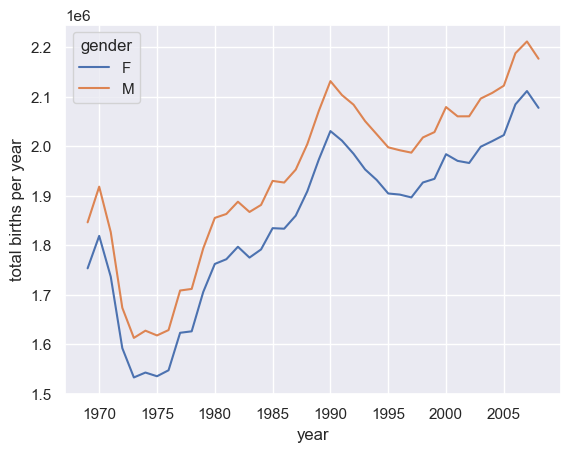

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

C:\Users\DELL\AppData\Local\Temp\ipykernel_2540\417602491.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


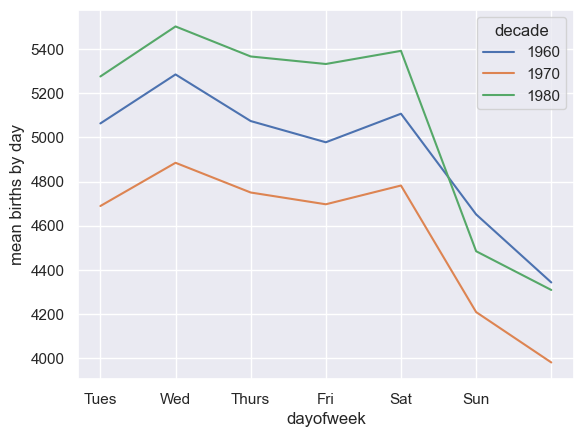

In [91]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)
 # create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

# Vectorized String Operations

In [73]:
#Introducing Pandas String Operations
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [74]:
 data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [75]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [76]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [77]:
#Methods similar to Python string methods
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])

monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [78]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [79]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [80]:
 monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

## Methods using regular expressions

In [81]:
#ability to concisely apply regular expressions across Series or DataFrame entries.
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [82]:
 monte.str.findall(r'^[AEIOU].*[aeiou]$')

0             []
1             []
2             []
3    [Eric Idle]
4             []
5             []
dtype: object

## Vectorized item access and slicing

In [83]:
#Vectorized item access and slicing. The get() and slice() operations
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [84]:
#Indexing via df.str.get(i) and df.str[i] is similar.
monte.str.get(2)

0    a
1    h
2    r
3    i
4    r
5    c
dtype: object

In [85]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [86]:
full_monte = pd.DataFrame({'name': monte,
'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [87]:
#The get_dummies() routine lets you quickly split out these indicator variables into a DataFrame:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# working with time series.

## Dates and Times in Python

In [92]:
from datetime import datetime
datetime(year=1995, month=3, day=8)
from dateutil import parser
date = parser.parse("8th of March, 1995")
date

datetime.datetime(1995, 3, 8, 0, 0)

In [89]:
 date.strftime('%A')

'Wednesday'

### Typed arrays of times: NumPy’s datetime64

In [95]:
import numpy as np
date = np.array('1995-03-08', dtype=np.datetime64)
date

array('1995-03-08', dtype='datetime64[D]')

In [97]:
date + np.arange(7)

array(['1995-03-08', '1995-03-09', '1995-03-10', '1995-03-11',
       '1995-03-12', '1995-03-13', '1995-03-14'], dtype='datetime64[D]')

## Dates and times in Pandas: Best of both worlds

In [98]:
import pandas as pd
date = pd.to_datetime("8th of March, 1995")
date

Timestamp('1995-03-08 00:00:00')

In [99]:
date.strftime('%A')

'Wednesday'

In [100]:
date + pd.to_timedelta(np.arange(7), 'D')

DatetimeIndex(['1995-03-08', '1995-03-09', '1995-03-10', '1995-03-11',
               '1995-03-12', '1995-03-13', '1995-03-14'],
              dtype='datetime64[ns]', freq=None)

# Motivating query() and eval(): Compound Expressions

In [101]:
#pandas.eval() for Efficient Operations-The eval() function in Pandas uses string expressions to efficiently compute operations using DataFrames
import pandas as pd
import numpy as np
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
for i in range(4))
df1.head(3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869,0.863103,0.623298,0.330898,0.063558,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891
1,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,0.289751,0.161221,0.929698,0.808120,0.633404,0.871461,0.803672,0.186570,0.892559,0.539342,0.807440,0.896091,0.318003,0.110052,0.227935,0.427108,0.818015,0.860731,0.006952,0.510747,0.417411,0.222108,0.119865,0.337615,0.942910,0.323203,0.518791,0.703019,0.363630,0.971782,0.962447,0.251782,0.497249,0.300878,0.284840,0.036887,0.609564,0.502679,0.051479,0.278646,0.908266,0.239562,0.144895,0.489453,0.985650,0.242055,0.672136,0.761620,0.237638,0.728216,0.367783,0.632306,0.633530,0.535775,0.090290,0.835302,0.320780,0.186519,0.040775,0.590893,0.677564,0.016588,0.512093,0.226496,0.645173,0.174366,0.690938,0.386735,0.936730,0.137521,0.341066,0.113474,0.924694,0.877339,0.257942,0.659984,0.817222,0.555201,0.529651,0.241852,0.093103,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876
2,0.642032,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,0.160808,0.548734,0.691895,0.651961,0.224269,0.712179,0.237249,0.325400,0.746491,0.649633,0.849223,0.657613,0.568309,0.093675,0.367716,0.265202,0.243990,0.973011,0.393098,0.892047,0.631139,0.794811,0.502637,0.576904,0.492518,0.195243,0.722452,0.280772,0.024316,0.645472,0.177111,0.940459,0.953929,0.914864,0.370159,0.015457,0.928319,0.428184,0.966655,0.963620,0.853009,0.294449,0.385098,0.851137,0.316922,0.169493,0.556801,0.936155,0.696030,0.570061,0.097176,0.615007,0.990054,0.140084,0.518330,0.877373,0.740769,0.697016,0.702484,0.359491,0.293592,0.809361,0.810113,0.867072,0.913241,0.511342,0.501516,0.798295,0.649964,0.701967,0.795793,0.890005,0.337995,0.375583,0.093982,0.578280,0.035942,0.465598,0.542645,0.286541,0.590833,0.030500,0.037348,0.822601,0.360191,0.127061,0.522243,0.769994,0.215821,0.622890,0.085347


In [102]:
 %timeit df1 + df2 + df3 + df4

130 ms ± 5.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [103]:
%timeit pd.eval('df1 + df2 + df3 + df4')

55.6 ms ± 699 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [104]:
#The eval() version of this expression is about 50% faster (and uses much less memory), while giving the same result:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4'))

True

## Operations supported by pd.eval()

### Arithmetic operators

In [105]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
for i in range(5))
# pd.eval() supports all arithmetic operators. 
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

### Comparison operators.

In [106]:
# pd.eval() supports all comparison operators, including chained expressions:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

### Bitwise operators.

In [ ]:
# pd.eval() supports the & and | bitwise operators:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

In [ ]:
#In addition, it supports the use of the literal and and or in Boolean expressions:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

### Object attributes and indices.

In [107]:
# pd.eval() supports access to object attributes via the obj.attr syntax, and indexes via the obj[index] syntax:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

In [108]:
df1.head(2)


,0,1,2
0,180,112,748
1,447,205,487


# DataFrame.eval() for Column-Wise Operations

In [109]:
#DataFrame.eval() for Column-Wise Operations
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [110]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [ ]:
#The DataFrame.eval() method allows much more succinct evaluation of expressions with the columns:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

## Assignment in DataFrame.eval()

In [111]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [112]:
#In the same way, any existing column can be modified:
df.eval('D = (A * B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,2.184893
1,0.069087,0.235615,0.154374,0.105446
2,0.677945,0.433839,0.652324,0.450879
3,0.264038,0.808055,0.347197,0.614514
4,0.589161,0.252418,0.557789,0.266615


## Local variables in DataFrame.eval()

In [113]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

## DataFrame.query() Method

In [114]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [115]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [116]:
#query() method also accepts the @ flag to mark local variables:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

# inspired by Python Data Science Handbook by Jake VanderPlas